DELEFOSSE Aymeric <span style="float:right">21213744</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TME  - Rappels de Proba/stats

## A. La planche de Galton (<font color="red">obligatoire</font>)

### A.1. Loi de Bernoulli
Écrire une fonction `bernoulli: float ->int` qui prend en argument la paramètre $p \in [0,1]$ et qui renvoie aléatoirement $0$ (avec la probabilité $1-p$) ou $1$ (avec la probabilité $p$).

In [2]:
def bernoulli(p):
    return int(np.random.rand() <= p)

In [3]:
# test de la méthode précédente (triviale pour Bernoulli mais utile en général)
print(np.array([bernoulli(0.3) for i in range(300)]).mean())  # moyenne de 300 tirages pour p = 0.3 => ~0.3
print(np.array([bernoulli(0.5) for i in range(300)]).mean())  # moyenne de 300 tirages pour p = 0.5 => ~0.5
print(np.array([bernoulli(1) for i in range(300)]).mean())  # moyenne de 300 tirages pour p = 1   => =1

0.32
0.5366666666666666
1.0


### A.2. Loi binomiale
Écrire une fonction `binomiale: int , float -> int` qui prend en argument un entier $n$ et $p \in [0,1]$ et qui renvoie aléatoirement un nombre tiré selon la distribution ${\cal B}(n,p)$.

In [4]:
def binomiale(n, p):
    return np.array([bernoulli(p) for i in range(n)]).sum()

In [5]:
# TEST
# espérance = np
print(np.array([binomiale(10, 0.3) for i in range(300)]).mean())  # moyenne de 300 tirages pour n=10 p = 0.3 => 3
print(np.array([binomiale(20, 0.3) for i in range(300)]).mean())  # moyenne de 300 tirages pour n=20 p = 0.3 => 6
print(np.array([binomiale(10, 0.8) for i in range(300)]).mean())  # moyenne de 300 tirages pour n=10 p = 0.8 => 8

3.0433333333333334
5.626666666666667
7.95


### A.3. Histogramme de la loi binomiale
<img src="tme2_Galton.jpg" title="Planche de Galton" style="float: right;">

Dans cette question, on considère une planche de Galton de hauteur $n$. On rappelle que des bâtons horizontaux (oranges) sont cloués à cette planche comme le montre la figure ci-contre. 

 Des billes bleues tombent du haut de la planche et, à chaque niveau, se retrouvent à la verticale d'un des bâtons. Elles vont alors tomber soit à gauche, soit à droite du bâton, jusqu'à atteindre le bas de la planche. Ce dernier est constitué de petites boites dont les bords sont symbolisés par les lignes verticales grises. 
 
Chaque boite renferme des billes qui sont passées exactement le même nombre de fois à droite des bâtons oranges. Par exemple, la boite la plus à gauche renferme les billes qui ne sont jamais passées à droite d'un bâton, celle juste à sa droite renferme les billes passées une seule fois à droite d'un bâton et toutes les autres fois à gauche, et ainsi de suite. 

La répartition des billes dans les boites suit donc une loi binomiale ${\cal B}(n,0.5)$. 

Écrire un script qui crée un tableau de $1000$ cases dont le contenu correspond à $1000$ instanciations de la loi binomiale ${\cal B}(n,0.5)$. Afin de voir la répartition des billes dans la planche de Galton, tracer l'histogramme de ce tableau. Vous pourrez utiliser la fonction hist de matplotlib.pyplot: 

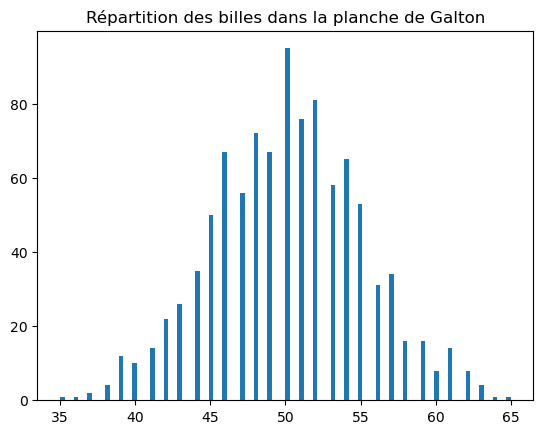

In [6]:
import matplotlib.pyplot as plt

# paramètres
n = 100
taille = 1000
# tableau
galton = [binomiale(n, 0.5) for i in range(taille)]
# histogramme
plt.hist(galton, n)
plt.title("Répartition des billes dans la planche de Galton")
plt.show()

Pour le nombre de bins, calculez le nombre de valeurs différentes dans votre tableau.

In [7]:
print("Nombre de bins (valeurs différentes du tableau) :", len(np.unique(galton)))

Nombre de bins (valeurs différentes du tableau) : 31


## B. Visualisation d'indépendances (<font color="red">obligatoire</font>)

### B.1. Loi normale centrée réduite
<img src="tme2_normale.jpg" title="Planche de Galton" style="float: right;">

On souhaite visualiser la fonction de densité de la loi normale. Pour cela, on va créer un ensemble de $k$ points $(x_i,y_i$), pour des $x_i$ équi-espacés variant de $-2σ$ à $2σ$, les $y_i$ correspondant à la valeur de la fonction de densité de la loi normale centrée de variance $σ^2$, autrement dit ${\cal N}(0,σ^2)$.

Écrire une fonction `normale : int , float -> float np.array` qui, étant donné un paramètre entier `k` impair et un paramètre réel `sigma` renvoie l'`array numpy` des $k$ valeurs $y_i$. Afin que l'`array numpy` soit bien symmétrique, on lèvera une exception si $k$ est pair.

On rappelle que la fonction de densité d'une loi normale s'exprime de la manière suivante :

$ f(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp{(-\frac{1}{2}(\frac{x-\mu}{\sigma})^2)} $

In [8]:
def normale(k, sigma):
    if k % 2 == 0:
        raise ValueError("le nombre k doit etre impair")
    X = np.linspace(-2 * sigma, 2 * sigma, k)
    Y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * (X / sigma) ** 2)
    return X, Y

Vérfier la validité de votre fonction en affichant grâce à la fonction `plot` les points générés dans une figure. 

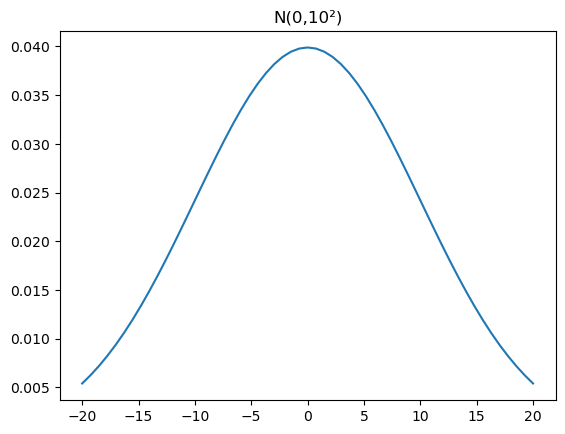

In [9]:
n = 55
sigma = 10
X, Y = normale(n, sigma)

plt.plot(X, Y)
plt.title("N(0,10²)")
plt.show()

### B.2. Distribution de probabilité affine
<img src="tme2_lineaire.jpg" title="Distribution affine" style="float: right;">

Dans cette question, on considère une généralisation de la distribution uniforme: une distribution affine, c'est-à-dire que la fonction de densité est une droite, mais pas forcément horizontale, comme le montre la figure ci-contre. 

Écrire une fonction `proba_affine : int , float -> float np.array` qui, comme dans la question précédente, va générer un ensemble de $k$ points $y_i, i=0,...,k−1$, représentant cette distribution (paramétrée par sa pente `slope`). On vérifiera ici aussi que l'entier $k$ est impair. Si la pente est égale à $0$, c'est-à-dire si la distribution est uniforme, chaque point $y_i$ devrait être égal à $\frac{1}{k}$ (afin que $\sum y_i=1$). Si la pente est différente de $0$, il suffit de choisir, $\forall i=0,...,k−1$,

$$y_i=\frac{1}{k}+(i−\frac{k−1}{2})×slope$$

Vous pourrez aisément vérifier que, ici aussi, $\sum y_i=1$. Afin que la distribution soit toujours positive (c'est quand même un minimum pour une distribution de probabilité), il faut que la pente slope ne soit ni trop grande ni trop petite. Le bout de code ci-dessous lèvera une exception si la pente est trop élevée et indiquera la pente maximale possible. 

                             Y               Somme
k=5, slope=0    : [0.2 0.2 0.2 0.2 0.2] 1.0
k=5, slope=0.01 : [0.18 0.19 0.2  0.21 0.22] 1.0
k=5, slope=0.08 : [0.04 0.12 0.2  0.28 0.36] 1.0


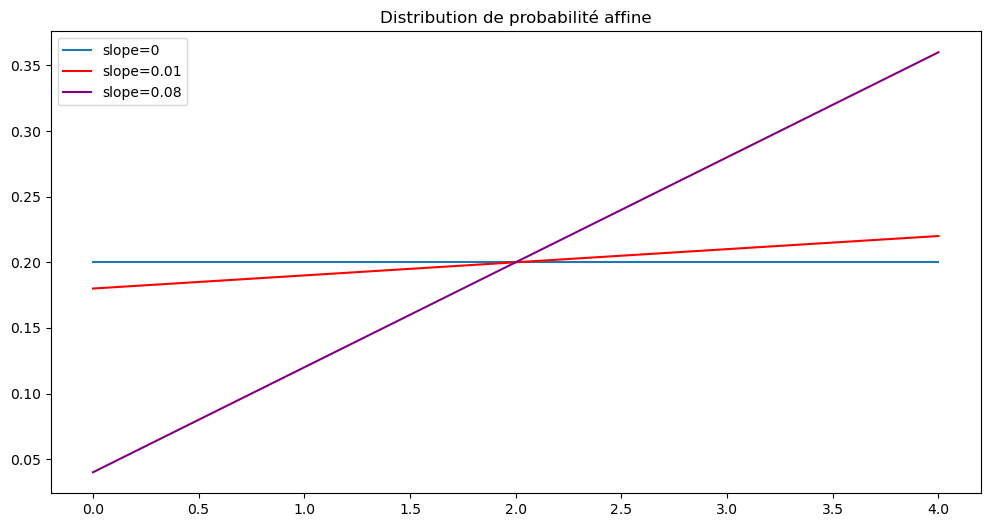

In [10]:
def proba_affine(k, slope):
    if k % 2 == 0:
        raise ValueError("le nombre k doit etre impair")
    if abs(slope) > 2.0 / (k * k):
        raise ValueError("la pente est trop raide : pente max = " + str(2.0 / (k * k)))
    return 1 / k + (np.arange(k) - (k - 1) / 2) * slope


print("                             Y               Somme")
print("k=5, slope=0    :", proba_affine(5, 0), np.sum(proba_affine(5, 0)))
print("k=5, slope=0.01 :", proba_affine(5, 0.01), np.sum(proba_affine(5, 0.01)))
print("k=5, slope=0.08 :", proba_affine(5, 0.08), np.sum(proba_affine(5, 0.08)))

# plots
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(5), proba_affine(5, 0), label="slope=0")
ax.plot(np.arange(5), proba_affine(5, 0.01), color="red", label="slope=0.01")
ax.plot(np.arange(5), proba_affine(5, 0.08), color="purple", label="slope=0.08")
ax.legend()
plt.title("Distribution de probabilité affine")
plt.show()

### B.3. Distribution jointe
Écrire une fonction `Pxy : float np.array , float np.array -> float np.2D-array` qui, étant donné deux tableaux numpy de nombres réels à $1$ dimension générés par les fonctions des questions précédentes et représentant deux distributions de probabilités $P(A)$ et $P(B)$, renvoie la distribution jointe $P(A,B)$ sous forme d'un tableau `numpy` à $2$ dimensions de nombres réels, en supposant que $A$ et $B$ sont des variables aléatoires indépendantes. Par exemple, si :

In [11]:
PA = np.array([0.2, 0.7, 0.1])
PB = np.array([0.4, 0.4, 0.2])

alors `Pxy(A,B)` renverra le tableau :
```
np.array([[ 0.08,  0.08,  0.04],
          [ 0.28,  0.28,  0.14],
          [ 0.04,  0.04,  0.02]])
```

On rappelle que si $A, B$ sont deux variables aléatoires indépendantes, alors $P(A,B) = P(A) \times P(B)$ .

In [12]:
def Pxy(x, y):
    """en utilisant des boucles"""
    Pxy = np.zeros(shape=(len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            Pxy[i, j] = x[i] * y[j]
    return Pxy


print("Distribution jointe P(A,B) :\n", Pxy(PA, PB))

Distribution jointe P(A,B) :
 [[0.08 0.08 0.04]
 [0.28 0.28 0.14]
 [0.04 0.04 0.02]]


In [13]:
def Pxy(x, y):
    """sans utiliser de boucles (produit tensoriel)"""
    return np.outer(x, y)


print("Distribution jointe P(A,B) :\n", Pxy(PA, PB))

Distribution jointe P(A,B) :
 [[0.08 0.08 0.04]
 [0.28 0.28 0.14]
 [0.04 0.04 0.02]]


### B.4. Affichage de la distribution jointe
<img src="tme2_jointe.jpg" title="Distribution jointe" style="float: right;">

Le code ci-dessous permet d'afficher en 3D une probabilité jointe générée par la fonction précédente. Exécutez-le avec une probabilité jointe résultant de la combinaison d'une loi normale et d'une distribution affine. 

Si la commande `%matplotlib notebook` fonctionne, vous pouvez interagir avec la courbe. Si le contenu de la fenêtre est vide, redimensionnez celle-ci et le contenu devrait apparaître. Cliquez à la souris à l'intérieur de la fenêtre et bougez la souris en gardant le bouton appuyé afin de faire pivoter la courbe. Observez sous différents angles cette courbe. Refaites l'expérience avec une probaiblité jointe résultant de deux lois normales. Essayez de comprendre ce que signifie, visuellement, l'indépendance probabiliste. Vous pouvez également recommencer l'expérience avec le logarithme des lois jointes.


In [14]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib notebook
# essayer `%matplotib notebook` pour interagir avec la visualisation 3D


def dessine(P_jointe):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    x = np.linspace(-3, 3, P_jointe.shape[0])
    y = np.linspace(-3, 3, P_jointe.shape[1])
    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, P_jointe, rstride=1, cstride=1)
    ax.set_xlabel("A")
    ax.set_ylabel("B")
    ax.set_zlabel("P(A) * P(B)")
    plt.show()

<IPython.core.display.Javascript object>


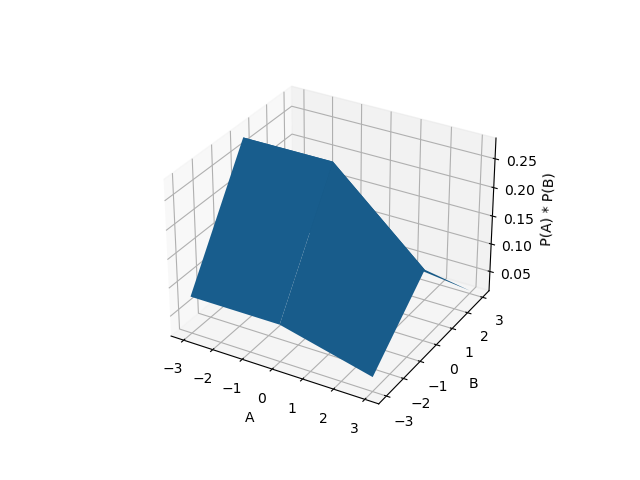

In [15]:
dessine(np.array([[0.08, 0.08, 0.04], [0.28, 0.28, 0.14], [0.04, 0.04, 0.02]]))

<IPython.core.display.Javascript object>


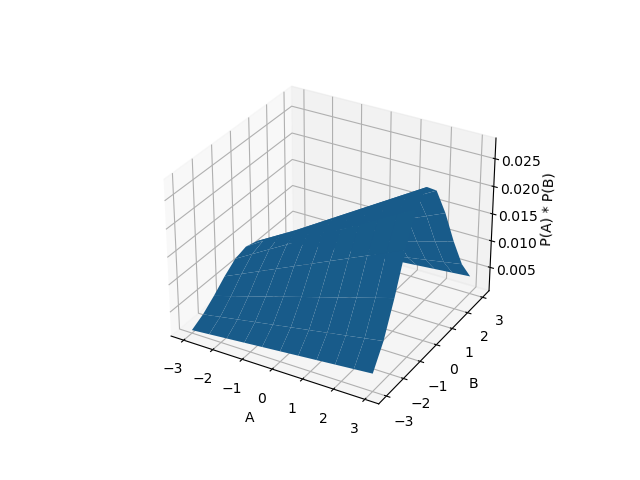

In [16]:
# paramètres
k = 11
sigma = 2
slope = 0.01
# lois
Pnorm = normale(k, sigma)[1]
Paffine = proba_affine(k, slope)
# plot
dessine(Pxy(Pnorm, Paffine))

<IPython.core.display.Javascript object>


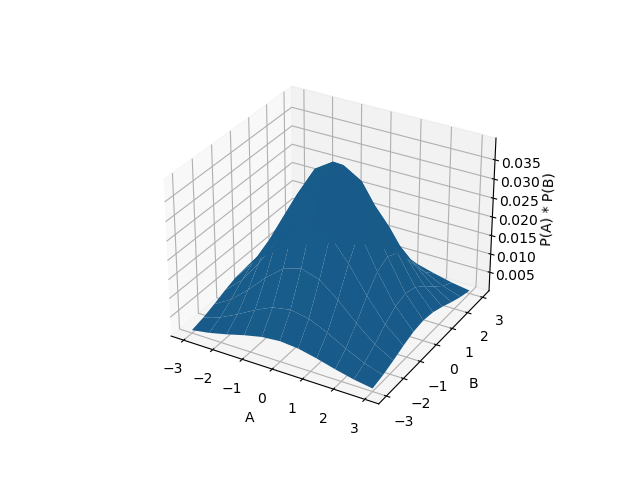

In [17]:
dessine(Pxy(Pnorm, Pnorm))

<IPython.core.display.Javascript object>


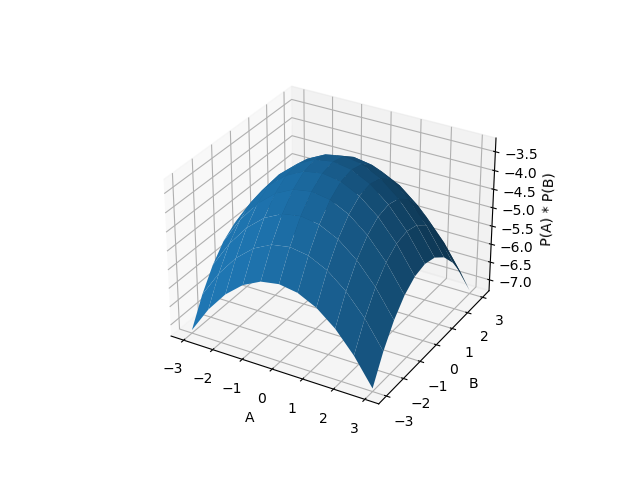

In [18]:
dessine(np.log(Pxy(Pnorm, Pnorm)))

## C. Indépendances conditionnelles (<font color="red">obligatoire</font>)

Dans cet exercice, on considère quatre variables aléatoires booléennes $X$, $Y$, $Z$ et $T$ ainsi que leur distribution jointe $P(X,Y,Z,T)$ encodée en python de la manière suivante : 

In [19]:
# creation de P(X,Y,Z,T)
P_XYZT = np.array(
    [
        [[[0.0192, 0.1728], [0.0384, 0.0096]], [[0.0768, 0.0512], [0.016, 0.016]]],
        [[[0.0144, 0.1296], [0.0288, 0.0072]], [[0.2016, 0.1344], [0.042, 0.042]]],
    ]
)

Ainsi, $\forall (x,y,z,t) \in \{0,1\}^4$, `P_XYZT[x][y][z][t]` correspond à $P(X=x,Y=y,Z=z,T=t)$ ou, en version abrégée, à $P(x,y,z,t)$. 

### C.1. Indépendance de X et T conditionnellement à (Y,Z)
On souhaite tester si les variables aléatoires $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$. Il s'agit donc de vérifer que dans la loi $P$ :

$$P(X,T|Y,Z)=P(X|Y,Z)\cdot P(T|Y,Z)$$

Pour cela, tout d'abord, calculer à partir de `P_XYZT` le tableau `P_YZ` représentant la distribution $P(Y,Z)$. On rappelle que 

$$P(Y,Z)=\sum_{X,T} P(X,Y,Z,T)$$

Le tableau `P_YZ` est donc un tableau à deux dimensions, dont la première correspond à $Y$ et la deuxième à $Z$. Si vous ne vous êtes pas trompé(e)s, vous devez obtenir le tableau suivant : 
```
np.array([[ 0.336,  0.084],
          [ 0.464,  0.116]])
```

Ainsi $P(Y=0,Z=1)=$ `P_YZ[0][1]` $=0.084$

Il est possible d'utiliser 2 méthodes pour calculer nos distributions. La première, très brute, en utilisant des boucles sur chacune de nos variables ; la deuxième, beaucoup plus simple et efficace, en utilisant des opérations numériques directement sur nos tableaux.

In [20]:
# Méthode utilisant des boucles, peut très vite prendre du temps si on beaucoup de variables
P_YZ = np.zeros((2, 2))
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                P_YZ[y, z] += P_XYZT[x, y, z, t]

print("Méthode utilisant des boucles : \nP_YZ = \n", P_YZ)

Méthode utilisant des boucles : 
P_YZ = 
 [[0.336 0.084]
 [0.464 0.116]]


In [21]:
# Méthode sans utiliser de boucles mais des opérations directement sur notre array
P_YZ = P_XYZT.sum((0, 3))  # on somme sur P_XYZT[0] = P(X=x) et P_XYZT[3] = P(T=t)

print("Méthode utilisant numpy : \nP_YZ = \n", P_YZ)

Méthode utilisant numpy : 
P_YZ = 
 [[0.336 0.084]
 [0.464 0.116]]


Ensuite, calculer le tableau `P_XTcondYZ` représentant la distribution $P(X,T|Y,Z)$. Ce tableau a donc 4 dimensions, chacune correspondant à une des variables aléatoires. De plus, les valeurs de `P_XTcondYZ` sont obtenues en utilisant la formule des probabilités conditionnelles: $$P(X,T|Y,Z)=\frac{P(X,Y,Z,T)}{P(Y,Z)}$$

Check: `P_XTcondYZ` =

  `[[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]
  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]`


In [22]:
# Méthode utilisant des boucles, peut très vite prendre du temps si on beaucoup de variables
P_XTcondYZ = np.zeros((2, 2, 2, 2))
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                P_XTcondYZ[x, y, z, t] += P_XYZT[x, y, z, t] / P_YZ[y, z]

print("Méthode utilisant des boucles : \nP_XTcondYZ = \n", P_XTcondYZ)

Méthode utilisant des boucles : 
P_XTcondYZ = 
 [[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]

  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]]


 [[[0.04285714 0.38571429]
   [0.34285714 0.08571429]]

  [[0.43448276 0.28965517]
   [0.36206897 0.36206897]]]]


In [23]:
# Méthode sans utiliser de boucles mais des opérations directement sur notre array. Ici, la difficulté réside
# dans le fait que la taille de nos deux matrices aient la même shape pour obtenir le bon résultat.
P_YZ_reshaped = P_XYZT.sum((0, 3), keepdims=True)  # keepdims broadcast correctly against the input array (acts as
# a reshape : instead of having a (2,2) matrix we have
# (1,2,2,1) matrix).
# ou encore : P_YZ = P_XYZT.sum((0,3)).reshape(1,2,2,1)
P_XTcondYZ = P_XYZT / P_YZ_reshaped

print("Méthode utilisant numpy : \nP_XTcondYZ = \n", P_XTcondYZ)

Méthode utilisant numpy : 
P_XTcondYZ = 
 [[[[0.05714286 0.51428571]
   [0.45714286 0.11428571]]

  [[0.16551724 0.11034483]
   [0.13793103 0.13793103]]]


 [[[0.04285714 0.38571429]
   [0.34285714 0.08571429]]

  [[0.43448276 0.28965517]
   [0.36206897 0.36206897]]]]


Calculer à partir de `P_XTcondYZ` les tableaux à 3 dimensions `P_XcondYZ` et `P_TcondYZ` représentant respectivement les distributions $P(X|Y,Z)$ et $P(T|Y,Z)$. On rappelle que :

$$P(X|Y,Z)=∑_T P(X,T|Y,Z)$$

Check :

`P_XcondYZ=
[[[0.57142857 0.57142857]
[0.27586207 0.27586207]]
 [[0.42857143 0.42857143]
  [0.72413793 0.72413793]]]
`

In [24]:
# Méthode utilisant des boucles, peut très vite prendre du temps si on beaucoup de variables
P_XcondYZ = np.zeros((2, 2, 2))
P_TcondYZ = np.zeros((2, 2, 2))
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                P_XcondYZ[x, y, z] += P_XTcondYZ[x, y, z, t]
                P_TcondYZ[y, z, t] += P_XTcondYZ[x, y, z, t]

print("Méthode utilisant des boucles :")
print("P_XcondYZ = \n", P_XcondYZ)
print("P_TcondYZ = \n", P_TcondYZ)

Méthode utilisant des boucles :
P_XcondYZ = 
 [[[0.57142857 0.57142857]
  [0.27586207 0.27586207]]

 [[0.42857143 0.42857143]
  [0.72413793 0.72413793]]]
P_TcondYZ = 
 [[[0.1 0.9]
  [0.8 0.2]]

 [[0.6 0.4]
  [0.5 0.5]]]


In [25]:
# Méthode utilisant des opérations numériques directement sur notre array
P_XcondYZ = P_XTcondYZ.sum(3)
P_TcondYZ = P_XTcondYZ.sum(0)

print("Méthode utilisant numpy :")
print("P_XcondYZ = \n", P_XcondYZ)
print("P_TcondYZ = \n", P_TcondYZ)

Méthode utilisant numpy :
P_XcondYZ = 
 [[[0.57142857 0.57142857]
  [0.27586207 0.27586207]]

 [[0.42857143 0.42857143]
  [0.72413793 0.72413793]]]
P_TcondYZ = 
 [[[0.1 0.9]
  [0.8 0.2]]

 [[0.6 0.4]
  [0.5 0.5]]]


Enfin, tester si $X$ et $T$ sont indépendantes conditionnellement à $(Y,Z)$. Si c'est bien le cas, on doit avoir :

$$P(X,T|Y,Z)=P(X|Y,Z)×P(T|Y,Z)$$ 

In [26]:
# Méthode utilisant des boucles, peut très vite prendre du temps si on beaucoup de variables
prod = np.zeros((2, 2, 2, 2))
for x in range(P_XYZT.shape[0]):
    for y in range(P_XYZT.shape[1]):
        for z in range(P_XYZT.shape[2]):
            for t in range(P_XYZT.shape[3]):
                prod[x, y, z, t] = P_XcondYZ[x, y, z] * P_TcondYZ[y, z, t]

if np.allclose(prod, P_XTcondYZ):
    print("X et T sont indépendantes conditionnellement à (Y, Z).")
else:
    print("X et T ne sont pas indépendantes conditionnellement à (Y,Z).")

X et T sont indépendantes conditionnellement à (Y, Z).


In [27]:
# Méthode utilisant des opérations numériques directement sur notre array
if np.allclose(P_XTcondYZ, P_XTcondYZ.sum(3, keepdims=True) * P_XTcondYZ.sum(0, keepdims=True)):
    print("X et T sont indépendantes conditionnellement à (Y, Z).")
else:
    print("X et T ne sont pas indépendantes conditionnellement à (Y,Z).")

X et T sont indépendantes conditionnellement à (Y, Z).


### C.2. Indépendance de X et (Y,Z)

On souhaite maintenant déterminer si $X$ et $(Y,Z)$ sont indépendantes. Pour cela, commencer par calculer à partir de `P_XYZT` le tableau `P_XYZ` représentant la distribution $P(X,Y,Z)$. 

Ensuite, calculer à partir de `P_XYZ` les tableaux `P_X` et `P_YZ` représentant respectivement les distributions $P(X)$ et $P(Y,Z)$. On rappelle que :

$$P(X)=∑_Y∑_Z P(X,Y,Z)$$

Si vous ne vous êtes pas trompé(e), P_X doit être égal au tableau suivant : 
```
np.array([ 0.4,  0.6])
```

In [28]:
P_XYZ = P_XYZT.sum(3)
print("P_XYZ = \n", P_XYZ)

P_X = P_XYZ.sum((1, 2))
print("P_X = \n", P_X)

P_YZ = P_XYZ.sum(0)
print("P_YZ = \n", P_YZ)

P_XYZ = 
 [[[0.192 0.048]
  [0.128 0.032]]

 [[0.144 0.036]
  [0.336 0.084]]]
P_X = 
 [0.4 0.6]
P_YZ = 
 [[0.336 0.084]
 [0.464 0.116]]


Enfin, si $X$ et $(Y,Z)$ sont bien indépendantes, on doit avoir :

$$P(X,Y,Z)=P(X)×P(Y,Z)$$

Check : Non, ce n'est pas indépendant.

In [29]:
if np.allclose(P_XYZ, P_XYZ.sum((1, 2), keepdims=True) * P_XYZ.sum(0, keepdims=True)):
    print("X et (Y, Z) sont indépendantes.")
else:
    print("X et (Y, Z) ne sont pas indépendantes.")

X et (Y, Z) ne sont pas indépendantes.


## D. Indépendances conditionnelles et consommation mémoire  (<font color="red">obligatoire</font>)

Le but de cet exercice est d'exploiter les probabilités conditionnelles et les indépendances conditionnelles afin de décomposer une probabilité jointe en un produit de "petites probabilités conditionnelles". Cela permet de stocker des probabilités jointes de grandes tailles sur des ordinateurs "standards". Au cours de l'exercice, vous allez donc partir d'une probabilité jointe et, progressivement, construire un programme qui identifie ces indépendances conditionnelles.

Pour simplifier, dans la suite de cet exercice, nous allons considérer un ensemble $X_0,…,X_n$ de variables aléatoires binaires (elles ne peuvent prendre que 2 valeurs : 0 et 1). 

### Simplification du code : utilisation de pyAgrum

Manipuler des probabilités et des opérations sur des probabilités complexes est difficiles avec les outils classiques. La difficulté principale est certainement le problème du mapping entre axe et variable aléatoire. `pyAgrum` propose une gestion de `Potential` qui sont des tableaux multidimensionnels dont les axes sont caractérisés par des variables et sont donc non ambigüs.

Par exemple, après l'initiation du `Potential PABCD` :

In [30]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

X, Y, Z, T = [gum.LabelizedVariable(x, x, 2) for x in "XYZT"]
pXYZT = gum.Potential().add(T).add(Z).add(Y).add(X)
pXYZT[:] = [
    [[[0.0192, 0.1728], [0.0384, 0.0096]], [[0.0768, 0.0512], [0.016, 0.016]]],
    [[[0.0144, 0.1296], [0.0288, 0.0072]], [[0.2016, 0.1344], [0.042, 0.042]]],
]

On peut alors utiliser la méthode `margSumOut` qui supprime les variables par sommations: `p.margSumOut(['X','Y'])` correspond à calculer $\sum_{X,Y} p$.

La réponse a question III.1 se calcule donc ainsi :

In [31]:
pXT_YZ = pXYZT / pXYZT.margSumOut(["X", "T"])
pX_YZ = pXT_YZ.margSumOut(["T"])
pT_YZ = pXT_YZ.margSumOut(["X"])

if pXT_YZ == pX_YZ * pT_YZ:
    print("=> X et T sont indépendants conditionnellemnt à Y et Z")
else:
    print("=> pas d'indépendance trouvée")

=> X et T sont indépendants conditionnellemnt à Y et Z


La réponse à la question III.2 se calcule ainsi :

In [32]:
pXYZ = pXYZT.margSumOut("T")
pYZ = pXYZ.margSumOut("X")
pX = pXYZ.margSumOut(["Y", "Z"])
if pXYZ == pX * pYZ:
    print("=> X et YZ sont indépendants")
else:
    print("=> pas d'indépendance trouvée")

=> pas d'indépendance trouvée


In [33]:
gnb.sideBySide(pXYZ, pX, pYZ, pX * pYZ, captions=["$P(X,Y,Z)$", "$P(X)$", "$P(Y,Z)$", "$P(X)\cdot P(Y,Z)$"])

`asia.txt` contient la description d'une probabilité jointe sur un ensemble de $8$ variables aléatoires binaires (256 paramètres). Le fichier est produit à partir du site web [http://www.bnlearn.com/bnrepository/](http://www.bnlearn.com/bnrepository/).

Le code suivant permet de lire ce fichier et d'en récupérer la probabilité jointe (sous forme d'une `gum.Potential`) qu'il contient : 

In [34]:
def read_file(filename):
    """
    Renvoie les variables aléatoires et la probabilité contenues dans le
    fichier dont le nom est passé en argument.
    """
    Pres = gum.Potential()
    vars = []

    with open(filename, "r") as fic:
        # on rajoute les variables dans le potentiel
        nb_vars = int(fic.readline())
        for i in range(nb_vars):
            name, domsize = fic.readline().split()
            vars.append(name)
            variable = gum.LabelizedVariable(name, name, int(domsize))
            Pres.add(variable)

        # on rajoute les valeurs de proba dans le potentiel
        cpt = []
        for line in fic:
            cpt.append(float(line))
        Pres.fillWith(cpt)
    return vars, Pres


vars, Pjointe = read_file("asia.txt")
# afficher Pjointe est un peu délicat (retire le commentaire de la ligne suivante)
# Pjointe

print("Les variables : " + str(vars))

Les variables : ['visit_to_Asia?', 'tuberculosis?', 'smoking?', 'lung_cancer?', 'tuberculosis_or_lung_cancer?', 'bronchitis?', 'positive_Xray?', 'dyspnoea?']


In [35]:
# Noter qu'il existe une fonction margSumIn qui, à l'inverse de MargSumOut, élimine
# toutes les variables qui ne sont pas dans les arguments
Pjointe.margSumIn(["tuberculosis?", "lung_cancer?"])

(pyAgrum.Potential<double>@00000283F8DBEE10) 
      ||  tuberculosis?    |
lung_c||0        |1        |
------||---------|---------|
0     || 0.0006  | 0.0544  |
1     || 0.0098  | 0.9352  |

### D.1. Test d'indépendance conditionnelle

En utilisant la méthode `margSumIn` (voir juste au dessus), écrire une fonction `conditional_indep: Potential,str,str,list[str]->bool` qui rend vrai si dans le `Potential`, on peut lire l'indépendance conditionnelle.

Par exemple, l'appel `conditional_indep(Pjointe,'bronchitis?', 'positive_Xray?',['tuberculosis?','lung_cancer?'])` vérifie si `bronchitis` est indépendante de `posititve_Xray` conditionnellement à `tuberculosis?` et `lung_cancer?`.

D'un point de vue général, on vérifie que $X$ et $Y$ sont indépendants conditionnellement à $Z_1,\cdots,Z_d$ par l'égalité :

$$P(X,Y|Z_1,\cdots,Z_d)=P(X|Z_1,\cdot,Z_d)\cdot P(Y|Z_1,\cdots,Z_d)$$

Ces trois probabilités sont calculables à partir de la loi jointe de $P(X,Y,Z_1,\cdots,Z_d)$.

**Remarque :** Vérifier l'égalité `P==Q` de 2 `Potential` peut être problématique si les 2 sont des résultats de calcul : il peut exister une petite variation. Un meilleur test est de vérifier `(P-Q).abs().max()<epsilon` avec un `epsilon` assez petit.

In [36]:
def conditional_indep_avec_margSumIn(P, X, Y, Zs, e=1e-10):
    PXYZs = P.margSumIn([X, Y] + Zs)  # P(X,Y,Z)
    if Zs == []:
        PXY_Zs = PXYZs  # P(X,Y|Z)
    else:
        PZs = PXYZs.margSumIn(Zs)  # P(Z)
        PXY_Zs = PXYZs / PZs  # P(X,Y|Z)
    PX_Zs = PXY_Zs.margSumOut(Y)  # P(X|Z)
    PY_Zs = PXY_Zs.margSumOut(X)  # P(Y|Z)
    return (PXY_Zs - (PX_Zs * PY_Zs)).abs().max() < e

In [37]:
conditional_indep_avec_margSumIn(Pjointe, "bronchitis?", "positive_Xray?", ["tuberculosis?", "lung_cancer?"])

True

In [38]:
conditional_indep_avec_margSumIn(Pjointe, "bronchitis?", "visit_to_Asia?", [])
# Test : doit renvoyer True

True

Même fonction réécrite à l'aide de `margSumOut` au lieu de `margSumIn`.

In [39]:
def conditional_indep(P, X, Y, Zs, e=1e-10):
    PXY_Zs = P / P.margSumOut([X, Y])  # P(X,Y|Z)
    PX_Zs = PXY_Zs.margSumOut(Y)  # P(X|Z)
    PY_Zs = PXY_Zs.margSumOut(X)  # P(Y|Z)
    return (PXY_Zs - (PX_Zs * PY_Zs)).abs().max() < e

In [40]:
conditional_indep(Pjointe, "bronchitis?", "positive_Xray?", ["tuberculosis?", "lung_cancer?"])
# Test : doit renvoyer True

True

In [41]:
conditional_indep(Pjointe, "bronchitis?", "visit_to_Asia?", [])
# Test : doit renvoyer True

True

### D.2. Factorisation compacte de loi jointe

On sait que si un ensemble de variables aléatoires ${\cal S} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$ peut être partitionné en deux sous-ensembles $\cal K$ et $\cal L$ (c'est-à-dire tels que ${\cal K} \cap {\cal L} = \emptyset$ et ${\cal K} \cup {\cal L} = \{X_{i_0},\ldots,X_{i_{n-1}}\}$) tels qu'une variable $X_{i_n}$ est indépendante de ${\cal L}$ conditionnellement à ${\cal K}$, alors :

$$P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}}) = P(X_{i_n} | {\cal K},{\cal L}) = P(X_{i_n} | {\cal K})$$

C'est ce que nous avons vu au cours n°2 (cf. définition des probabilités conditionnelles). Cette formule est intéressante car elle permet de réduire la taille mémoire consommée pour stocker $P(X_{i_n}|X_{i_0},\ldots,X_{i_{n-1}})$ : il suffit en effet de stocker uniquement $P(X_{i_n} | {\cal K})$ pour obtenir la même information.

Écrire une fonction `compact_conditional_proba: Potential,str-> Potential` qui, étant donné une probabilité jointe $P(X_{i_0},\ldots,X_{i_n})$, une variable aléatoire $X_{i_n}$, retourne cette probabilité conditionnelle $P(X_{i_n} | {\cal K})$. Pour cela, nous vous proposons l'algorithme itératif suivant :

```
K = S
Pour tout X in K :
  Si X indépendante de Xin conditionnellement à K\{X) alors :
    Supprimer X de K
Retourner P(Xin|K)$
```

Trois petites aides :

1. La fonction precédente `conditional_indep` devrait vous servir...

2. Obtenir la liste des noms des variables dans un `Potential` se fait par l'attribut : `P.var_names`.

3. Afin que l'affichage soit plus facile à comprendre, il peut être judicieux de placer la variable $X_{i_n}$ en premier dans la liste des variables du Potential, ce que l'on peut faire avec le code suivant : `proba = proba.putFirst(Xin)`.

In [42]:
def compact_conditional_proba(P, X):
    K = list(P.names)  # K=S
    for x in K:  # Pour tout X in K:
        if conditional_indep(P, x, X, K):  # Si X indépendante de Xin conditionnellement à K\{X) alors
            K.remove(x)  # Supprimer X de K
    Xin = K.copy()
    K.remove(X)
    # calcul de P(Xin|K)
    PX_K = P.margSumIn(Xin) / P.margSumIn(K)
    return PX_K.putFirst(X)

Le compactage de la loi jointe par rapport à `visit_to_Asia?` doit donner :

![Distribution compacte](compact_asia.png)

On voit bien que la cible ne dépend plus de toutes les autres variables.

In [43]:
compact_conditional_proba(Pjointe, "visit_to_Asia?")

(pyAgrum.Potential<double>@00000283F8DBED10) 
                           ||  visit_to_Asia?   |
tuberc|lung_c|bronch|dyspno||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 0.0481  | 0.9519  |
1     |0     |0     |0     || 0.0096  | 0.9904  |
0     |1     |0     |0     || 0.0481  | 0.9519  |
1     |1     |0     |0     || 0.0096  | 0.9904  |
0     |0     |1     |0     || 0.0481  | 0.9519  |
1     |0     |1     |0     || 0.0096  | 0.9904  |
[...4 more line(s) ...]
0     |1     |0     |1     || 0.0481  | 0.9519  |
1     |1     |0     |1     || 0.0096  | 0.9904  |
0     |0     |1     |1     || 0.0481  | 0.9519  |
1     |0     |1     |1     || 0.0096  | 0.9904  |
0     |1     |1     |1     || 0.0481  | 0.9519  |
1     |1     |1     |1     || 0.0096  | 0.9904  |

N'y-a-t'il pas un problème avec "ce que nous devons obtenir" ? Si nous étudions le tableau obtenu par compactage de la loi jointe, nous remarquons que nous avons les mêmes probas quelque soit nos variables ($[0.481, 0.9519, 0.0096, 0.9904]$) et `visit_to_Asia?`semble dépendre uniquement de `tubercolis?`. 

Effectivement, pour obtenir ce tableau (*i.e.* le tableau de l'énoncé), nous parcourons (*bouclons*) sur une liste où à chaque itération des élèments, ces mêmes élements sont susceptibles de s'enlever, rendant faux le calcul. Idem pour le compactage de la loi jointe sur `dyspnoea?`. Une version corrigée de l'algorithme est disponible juste après.

In [44]:
compact_conditional_proba(Pjointe, "dyspnoea?")

(pyAgrum.Potential<double>@00000283F8DBEF50) 
                           ||  dyspnoea?        |
tuberc|lung_c|tuberc|bronch||0        |1        |
------|------|------|------||---------|---------|
0     |0     |0     |0     || 0.9000  | 0.1000  |
1     |0     |0     |0     || 0.9000  | 0.1000  |
0     |1     |0     |0     || 0.9000  | 0.1000  |
1     |1     |0     |0     || 0.9000  | 0.1000  |
0     |0     |1     |0     || 0.7000  | 0.3000  |
1     |0     |1     |0     || 0.7000  | 0.3000  |
[...4 more line(s) ...]
0     |1     |0     |1     || 0.8000  | 0.2000  |
1     |1     |0     |1     || 0.8000  | 0.2000  |
0     |0     |1     |1     || 0.1000  | 0.9000  |
1     |0     |1     |1     || 0.1000  | 0.9000  |
0     |1     |1     |1     || 0.1000  | 0.9000  |
1     |1     |1     |1     || 0.1000  | 0.9000  |

In [45]:
def compact_conditional_proba(P, X):
    K = [x for x in P.names if not conditional_indep(P, x, X, P.names) and x != X]
    P_XK = P.margSumIn([X] + K)
    if K == []:
        PX_K = P_XK
    else:
        P_K = P_XK.margSumIn(K)
        PX_K = P_XK / P_K
    return PX_K.putFirst(X)

In [46]:
compact_conditional_proba(Pjointe, "visit_to_Asia?")

(pyAgrum.Potential<double>@00000283F8DBEBF0) 
      ||  visit_to_Asia?   |
tuberc||0        |1        |
------||---------|---------|
0     || 0.0481  | 0.9519  |
1     || 0.0096  | 0.9904  |

In [47]:
compact_conditional_proba(Pjointe, "dyspnoea?")

(pyAgrum.Potential<double>@00000283F8DBED30) 
             ||  dyspnoea?        |
tuberc|bronch||0        |1        |
------|------||---------|---------|
0     |0     || 0.9000  | 0.1000  |
1     |0     || 0.7000  | 0.3000  |
0     |1     || 0.8000  | 0.2000  |
1     |1     || 0.1000  | 0.9000  |

### D.3. Création d'un réseau bayésien

Un réseau bayésien est simplement la décomposition d'une distribution de probabilité jointe en un produit de probabilités conditionnelles : vous avez vu en cours que $P(A,B) = P(A|B)P(B)$, et ce quels que soient les ensembles de variables aléatoires disjoints $A$ et $B$. En posant $A = X_n$ et $B = \{X_0,\ldots,X_{n-1}\}$, on obtient donc :

$$P(X_0,\ldots,X_n) = P(X_n | X_0,\ldots,X_{n-1}) P(X_0,\ldots,X_{n-1})$$

On peut réitérer cette opération pour le terme de droite en posant $A = X_{n-1}$ et $B=\{X_0,\ldots,X_{n-2}\}$, et ainsi de suite. Donc, par récurrence, on a :

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | X_0,\ldots,X_{i-1} )$$

Si on applique à chaque terme $P(X_i | X_0,\ldots,X_{i-1} )$ la fonction `compact_conditional_proba`, on obtient une décomposition :

$$P(X_0,\ldots,X_n) = P(X_0) \times \prod_{i=1}^n P(X_i | {\cal K_i})$$

avec $K_i \subseteq \{X_0,\ldots,X_{i-1}\}$}. Cette décomposition est dite ''compacte'' car son stockage nécessite en pratique beaucoup moins de mémoire que celui de la distribution jointe. C'est ce que l'on appelle un réseau bayésien.

Écrire une fonction `create_bayesian_network : Potential -> Potential list` qui, étant donné une probabilité jointe, vous renvoie la liste des $P(X_i | {\cal K_i})$. Pour cela, il vous suffit d'appliquer l'algorithme suivant :

```
liste = [] 
P = P(X_0,...,X_n)
Pour i de n à 0 faire :
  Calculer Q = compact_conditional_proba(P,X_i)
  Afficher la liste des variables de Q
  Rajouter Q à liste
  Supprimer X_i de P par marginalisation
Retourner liste
```

Il est intéressant ici de noter les affichages des variables de Q : comme toutes les variables sont binaires, Q nécessite uniquement (2 puissance le nombre de ces variables) nombres réels. Ainsi une probabilité sur 3 variables ne nécessite que {$2^3=8$} nombres réels.

In [48]:
def create_bayesian_network(P, affiche=False):
    PXi_Ki = []
    X = P.names
    n = len(X) - 1
    for i in range(n, -1, -1):
        Q = compact_conditional_proba(P, X[i])
        PXi_Ki.append(Q)  # rajouter Q à liste
        P = P.margSumOut(X[i])  # supprimer X_i de P par marginalisation
        if affiche:
            print(Q.names)  # afficher la liste des variables de Q
    return PXi_Ki

In [49]:
create_bayesian_network(Pjointe, affiche=True)

('dyspnoea?', 'tuberculosis_or_lung_cancer?', 'bronchitis?')
('positive_Xray?', 'tuberculosis_or_lung_cancer?')
('bronchitis?', 'smoking?')
('tuberculosis_or_lung_cancer?', 'tuberculosis?', 'lung_cancer?')
('lung_cancer?', 'smoking?')
('smoking?',)
('tuberculosis?', 'visit_to_Asia?')
('visit_to_Asia?',)


[(pyAgrum.Potential<double>@00000283F8DBEE50) 
              ||  dyspnoea?        |
 tuberc|bronch||0        |1        |
 ------|------||---------|---------|
 0     |0     || 0.9000  | 0.1000  |
 1     |0     || 0.7000  | 0.3000  |
 0     |1     || 0.8000  | 0.2000  |
 1     |1     || 0.1000  | 0.9000  |,
 (pyAgrum.Potential<double>@00000283F8DBEAF0) 
       ||  positive_Xray?   |
 tuberc||0        |1        |
 ------||---------|---------|
 0     || 0.9800  | 0.0200  |
 1     || 0.0500  | 0.9500  |,
 (pyAgrum.Potential<double>@00000283F8DBEB90) 
       ||  bronchitis?      |
 smokin||0        |1        |
 ------||---------|---------|
 0     || 0.6000  | 0.4000  |
 1     || 0.3000  | 0.7000  |,
 (pyAgrum.Potential<double>@00000283F8DBE970) 
              ||  tuberculosis_or_l|
 tuberc|lung_c||0        |1        |
 ------|------||---------|---------|
 0     |0     || 0.9900  | 0.0100  |
 1     |0     || 0.9900  | 0.0100  |
 0     |1     || 0.9900  | 0.0100  |
 1     |1     || 0.0100  | 0

### D.4. Gain en compression

On souhaite observer le gain en termes de consommation mémoire obtenu par votre décomposition. Si `P` est un `Potential`, alors `P.toarray().size` est égal à la taille (le nombre de paramètres) de la table `P`. Calculez donc le nombre de paramètres nécessaires pour stocker la probabilité jointe lue dans le fichier `asia.txt` ainsi que la somme des nombres de paramètres des tables que vous avez créées grâce à votre fonction `create_bayesian_network`. 

Check : le résultat attendu est : taille rb : 110   taille jointe : 256

*Pourquoi le résultat attendu est 110 alors que dans la partie suivante, gum.loadBN nous donne 36 ?*

In [50]:
print("taille jointe (qui devrait être égale à 2^8=256):", Pjointe.toarray().size)
print("taille rb :", sum([x.toarray().size for x in create_bayesian_network(Pjointe)]))
# pourquoi le résultat attendu est 110 alors que gum.loadBN nous donne 36 ?

taille jointe (qui devrait être égale à 2^8=256): 256
taille rb : 36


## E. Applications pratiques (optionnelle)

La technique de décomposition que vous avez vue est effectivement utilisée en pratique. Vous pouvez voir le gain que l'on peut obtenir sur différentes distributions de probabilité du site http://www.bnlearn.com/bnrepository/.

Cliquez sur le nom du dataset que vous voulez visualiser et téléchargez son `.bif` ou `.dsl`. Afin de visualiser le contenu du fichier, vous allez utiliser `pyAgrum`. Le code suivant vous permettra alors de visualiser votre dataset : la valeur indiquée après `domainSize` est la taille de la probabilité jointe d'origine (en nombre de paramètres) et celle après `dim` est la taille de la probabilité sous forme compacte (somme des tailles des probabilités conditionnelles compactes). 

In [51]:
# chargement de pyAgrum
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# chargement du fichier bif ou dsl
bn = gum.loadBN("asia.bif")

# affichage de la taille des probabilités jointes compacte et non compacte
print(bn)

# affichage graphique du réseau bayésien
bn

# notre gain en compression est bien 256 -> 36

BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}


(pyAgrum.BayesNet<double>@00000283F9269F70) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [52]:
# https://www.bnlearn.com/bnrepository/water/water.bif.gz
# chargement du fichier bif ou dsl
bn = gum.loadBN("water.bif")

# affichage de la taille des probabilités jointes compacte et non compacte
print(bn)

# affichage graphique du réseau bayésien
gnb.sideBySide(gnb.getBN(bn, size="10"))

BN{nodes: 32, arcs: 66, domainSize: 10^17.7667, dim: 13484}
